# Bài toán dự đoán giá nhà Boston

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv('data/Boston_Dataset.csv')

In [2]:
def normal(x:list):
    maxi = max(x)
    mini = min(x)
    avg = np.mean(x)
    new = [(i-avg)/(maxi - mini) for i in x]
    
    return new

In [3]:
df = data.copy()
df[:5]

,ID,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
3,5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
4,7,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311,15.2,395.60,12.43,22.9


In [4]:
df = df.apply(normal, axis=0)
df[:5]

,ID,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,-0.494954,-0.045616,0.073108,-0.332722,-0.06006,-0.039391,0.059911,-0.032196,0.039670,-0.375375,-0.216595,-0.366052,0.095155,-0.207931,0.027361
1,-0.492974,-0.045330,-0.106892,-0.156425,-0.06006,-0.181367,0.030089,0.113549,0.131219,-0.331897,-0.319846,-0.075354,0.095155,-0.093141,-0.025973
2,-0.489014,-0.045261,-0.106892,-0.337536,-0.06006,-0.204000,0.141824,-0.238579,0.245521,-0.288419,-0.358087,0.029297,0.089385,-0.264223,0.236250
3,-0.487034,-0.044763,-0.106892,-0.337536,-0.06006,-0.204000,0.170678,-0.149217,0.245521,-0.288419,-0.358087,0.029297,0.095155,-0.198274,0.298472
4,-0.483073,-0.044501,0.018108,-0.126796,-0.06006,-0.068198,-0.049113,-0.017302,0.193156,-0.201462,-0.187914,-0.377680,0.091850,-0.002357,0.002916


In [5]:
Xd = df.drop(['ID', 'medv'], axis=1)
Xd.insert(0, 'X0', 1) #add bias
Xd[:5]

,X0,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat
0,1,-0.045616,0.073108,-0.332722,-0.06006,-0.039391,0.059911,-0.032196,0.039670,-0.375375,-0.216595,-0.366052,0.095155,-0.207931
1,1,-0.045330,-0.106892,-0.156425,-0.06006,-0.181367,0.030089,0.113549,0.131219,-0.331897,-0.319846,-0.075354,0.095155,-0.093141
2,1,-0.045261,-0.106892,-0.337536,-0.06006,-0.204000,0.141824,-0.238579,0.245521,-0.288419,-0.358087,0.029297,0.089385,-0.264223
3,1,-0.044763,-0.106892,-0.337536,-0.06006,-0.204000,0.170678,-0.149217,0.245521,-0.288419,-0.358087,0.029297,0.095155,-0.198274
4,1,-0.044501,0.018108,-0.126796,-0.06006,-0.068198,-0.049113,-0.017302,0.193156,-0.201462,-0.187914,-0.377680,0.091850,-0.002357


In [6]:
y = df['medv'].values.reshape(-1,1)
y[:5]

array([[ 0.02736069],
       [-0.02597264],
       [ 0.23624958],
       [ 0.29847181],
       [ 0.00291625]])

In [7]:
X_train = Xd.values

In [8]:
m,n = X_train.shape
theta = np.ones((n,1))
print(m,n, theta.shape)

333 14 (14, 1)


### 1. Huấn luyện theo SGD

In [9]:
def stochastic_gradient_descent():
    epoches = 50
    learning_rate = 0.01
    
    #init parameter
    thetas = np.random.randn(n,1)
    
    thetas_path = []
    losses = []
    
    for epoch in range(epoches):
        for i in range(m):
            
            #Lay ngau nhien 1 sample
            random_index = np.random.randint(m)
            x_i = X_train[random_index:random_index+1]
            y_i = y[random_index:random_index+1]
            
            #tinh y_hat
            y_hat = np.dot(x_i, thetas)
            
            #tinh loss_i
            loss_i = (y_hat - y_i)**2
            
            #tinh gradient cho loss
            grad_loss_i = 2*(y_hat - y_i)
            
            #tinh gradient
            gradients = np.dot(x_i.T, grad_loss_i)
            
            #update thetas
            thetas = thetas - learning_rate*gradients
            
            #logging
            thetas_path.append(thetas)
            losses.append(loss_i[0][0])
    
    return thetas_path, losses            

In [10]:
sgd_thetas, losses = stochastic_gradient_descent()

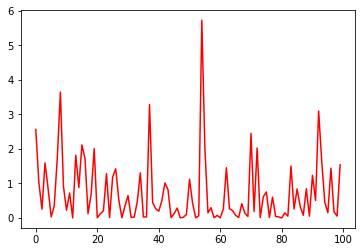

In [12]:
#In loss cho 100 sample dau tien
x_axis = list(range(100))
plt.plot(x_axis, losses[:100], color='r')
plt.show()

### 2. Huấn luyện theo MBGD

In [13]:
def mini_batch_gradient_descent():
    epoches = 200
    learning_rate = 0.01
    minibatch_size = 64
    
    thetas = np.random.randn(14,1)
    thetas_path = [thetas]
    losses = []
    
    for epoch in range(epoches):
        shuffled_indices = np.random.permutation(m)
        X_train_shuffled = X_train[shuffled_indices]
        y_shuffled = y[shuffled_indices]
        
        for i in range(0, m, minibatch_size):
            x_i = X_train_shuffled[i:i+minibatch_size]
            y_i = y_shuffled[i:i+minibatch_size]
            
            y_hat = np.dot(x_i, thetas)
            
            loss = (y_hat - y_i)**2
            
            loss_grd = 2*(y_hat - y_i)/minibatch_size
            
            gradients = np.dot(x_i.T, loss_grd)
            
            thetas = thetas - learning_rate*gradients
            thetas_path.append(thetas)
            
            loss_mean = np.sum(loss)/minibatch_size
            losses.append(loss_mean)
            
    return thetas_path, losses

In [14]:
mgbd_thetas, losses = mini_batch_gradient_descent()

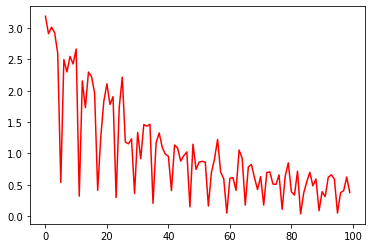

In [15]:
#in loss cho 100 sample dau
x_axis = list(range(100))
plt.plot(x_axis, losses[:100], color='r')
plt.show()

### 3. Huấn luyện theo BGD

In [16]:
def bath_gradient_descent():
    epoches = 500
    learning_rate = 0.01
    
    #init parameter
    thetas = np.random.randn(n,1)
    
    thetas_path = []
    losses = []
    
    for epoch in range(epoches):
        y_hat = np.dot(X_train, thetas)
            
        loss = (y_hat - y)**2
            
        loss_grd = 2*(y_hat - y)/m
            
        gradients = np.dot(X_train.T, loss_grd)
            
        thetas = thetas - learning_rate*gradients
        thetas_path.append(thetas)
            
        loss_mean = np.sum(loss)/m
        losses.append(loss_mean)
            
    return thetas_path, losses
        

In [17]:
bgd_thetas, losses = bath_gradient_descent()

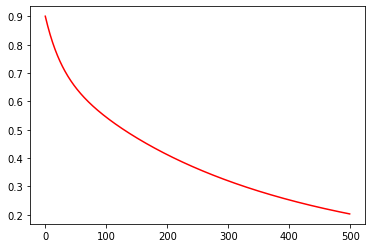

In [19]:
#in loss cho 500 sample dau tien
x_axis = list(range(500))
plt.plot(x_axis, losses[:500], color='r')
plt.show()